In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import manifold, preprocessing


In [3]:
cuisines=pd.read_csv('modified_data.csv')
cuisines.shape
# cuisines=preprocessing.normalize(cuisines.iloc[:,1:-1],axis=0)
# cuisines=pd.DataFrame(cuisines)


(4147, 296)

In [6]:
# cuisines.loc['occurance']=cuisines.apply(lambda x: x.sum())
# cuisines.drop('occurance',axis = 0, inplace = True)

tf_cuisines=cuisines.copy()
tf_cuisines.loc['occurance']=tf_cuisines.apply(lambda x: x.sum())
occ=tf_cuisines.T['occurance'][1:-1].sum()

tf_cuisines=tf_cuisines.apply(lambda y:(y/y['occurance']))
tf_cuisines.iloc[:-1,1:-1].to_csv('tf_data.csv')

In [7]:
tf_cuisines=tf_cuisines.apply(lambda y:(y/y['occurance'])*np.log(occ/y['occurance']))
tf_cuisines.iloc[:-1,1:-1].to_csv('tfidf_data.csv')

In [42]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
X_tsne = tsne.fit_transform(cuisines.iloc[:,1:-1])

# tsne = manifold.TSNE(n_components=cuisines.shape[0]-2000, method='exact', random_state=501)
# Y_tsne = tsne.fit_transform(cuisines.iloc[:,1:-1].T)


In [22]:
pd.DataFrame(Y_tsne.T)

,0,1,2,3,4,5,6,7,8,9,...,284,285,286,287,288,289,290,291,292,293
0,-0.115494,-0.100455,0.200040,-0.305938,-0.015157,-0.037933,0.045827,0.052011,-0.043166,0.002435,...,0.220902,-0.078294,0.065536,0.174640,-0.105664,0.208803,0.149046,-0.030411,0.042311,-0.018665
1,-0.041647,0.173598,-0.052183,-0.205537,-0.411054,0.074591,0.000902,-0.033596,-0.258361,0.021726,...,0.026405,0.093178,0.007346,0.081700,-0.059871,-0.152216,0.098868,-0.048123,-0.042531,-0.057004
2,0.008326,-0.228281,-0.229300,0.040286,-0.037703,0.228853,0.364731,0.056431,0.024200,0.250808,...,0.078779,0.169275,0.260922,0.636106,0.008643,0.512744,0.348540,0.002048,0.170892,-0.039169
3,-0.032772,-0.002590,-0.150836,-0.061761,0.064212,-0.355246,-0.077661,-0.041829,-0.016462,0.014487,...,0.049307,0.225953,-0.057759,0.054274,-0.139965,-0.038887,-0.015844,0.116479,0.097459,0.013585
4,-0.090628,-0.412997,0.128015,-0.096278,0.076335,-0.091956,-0.022442,0.016224,-0.045881,-0.024470,...,0.018748,0.160205,0.011763,0.023692,-0.082152,-0.105980,-0.025502,-0.008286,-0.010350,-0.034626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142,0.000748,0.221750,0.069599,-0.001842,0.007041,0.035230,-0.003430,0.121305,-0.036923,-0.046398,...,0.023595,-0.231266,-0.008846,-0.049642,-0.005781,0.084509,-0.070457,0.011363,-0.041287,0.028210
2143,-0.132170,-0.287263,-0.290969,-0.021095,0.567238,-0.100951,-0.010641,-0.337958,0.017440,-0.278390,...,-0.106237,-0.066393,-0.024909,-0.046899,-0.065829,-0.320446,0.004132,0.172334,1.152191,-0.295245
2144,-0.075950,-0.682995,0.436124,-0.173678,0.089971,0.480628,-0.012043,-0.053073,0.139662,0.166592,...,0.216706,0.278677,-0.024449,0.384319,-0.002267,0.301366,-0.043684,0.144710,0.158938,0.022447
2145,-0.048631,0.213416,-0.083968,0.441672,2.082773,0.501229,0.021959,0.402993,0.078738,0.332200,...,0.590424,-0.012096,-0.074113,0.099343,-0.080099,-0.215210,0.183899,0.545006,-0.956760,0.017927


In [16]:
tsne_data=pd.DataFrame(Y_tsne.T)
tsne_data.columns=cuisines.columns[1:-1]
tsne_data.to_csv('tsne_data.csv')
tsne_data

,allspice,almond,anchovy,anise,apple,arborio rice,artichoke,asparagus,assorted vegetables,avocado,...,whipping cream,white fish,white onion,wine,wine vinegar,worcestershire sauce,yeast,yogurt,zest,zucchini
0,-1.381823,-0.821641,-2.018823,-2.048390,-1.409384,-1.904547,-1.421401,-1.940071,-1.883500,-2.102057,...,-1.887996,-1.945781,-1.482506,7.071882,-0.090907,-0.920739,-2.039362,0.221435,-2.115522,-0.104084
1,-0.278730,-0.031104,-0.471086,0.024042,-0.369952,-0.489620,-0.811207,-0.132088,0.045323,-0.074310,...,-0.341074,-0.319186,-0.251481,-5.573307,-0.260999,-0.496345,-0.334663,0.242295,-0.080958,-0.734369
2,-0.158660,-1.104581,0.016670,-0.319800,0.287947,-0.365298,-0.421044,-0.007411,-0.136954,-0.166853,...,0.098567,-0.408593,-0.000368,3.875268,0.224298,0.736568,0.060513,-1.898445,-0.206532,-0.914365
3,-0.618030,-0.153741,0.159506,0.030192,-0.344837,0.283687,0.658060,0.219675,-0.159744,-0.034346,...,0.157948,0.093492,0.320228,6.217770,0.087765,-0.181724,-0.025559,-1.006872,0.242966,0.254443
4,0.173489,0.680669,0.123904,0.038413,-0.397974,0.012617,0.037288,0.080571,-0.059678,0.216005,...,0.405585,0.065743,0.392967,-3.019035,0.070776,-1.261113,0.138954,1.675001,0.091315,-0.267899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,-0.026914,-0.074091,-0.008819,-0.003164,-0.001042,-0.016072,0.011831,-0.111044,0.004454,-0.045602,...,0.010570,-0.007647,0.005275,0.008919,0.010580,-0.004425,-0.025926,-0.020187,-0.042542,-0.011965
290,-0.004442,0.031578,-0.025349,-0.009905,-0.000668,0.025738,-0.003586,0.027569,-0.001818,-0.106228,...,0.001301,-0.056032,0.001149,0.000077,0.000855,-0.000928,-0.007328,0.003865,-0.024543,0.019899
291,-0.004131,-0.000110,-0.012505,-0.006194,-0.000058,-0.011035,-0.003317,-0.003967,-0.000917,0.002244,...,-0.004990,-0.006288,0.000327,-0.000467,-0.000590,-0.002328,-0.012372,-0.000624,-0.011941,-0.002290
292,-0.001779,-0.000327,-0.003755,0.000745,-0.000375,-0.002077,-0.000429,-0.001322,-0.000544,-0.001824,...,-0.001150,-0.001910,-0.000118,0.000083,0.000139,-0.000938,-0.005342,0.000412,-0.002973,-0.000864


In [8]:
cuisines['cuisine'][0:5]

0    0
1    0
2    0
3    0
4    0
Name: cuisine, dtype: int64

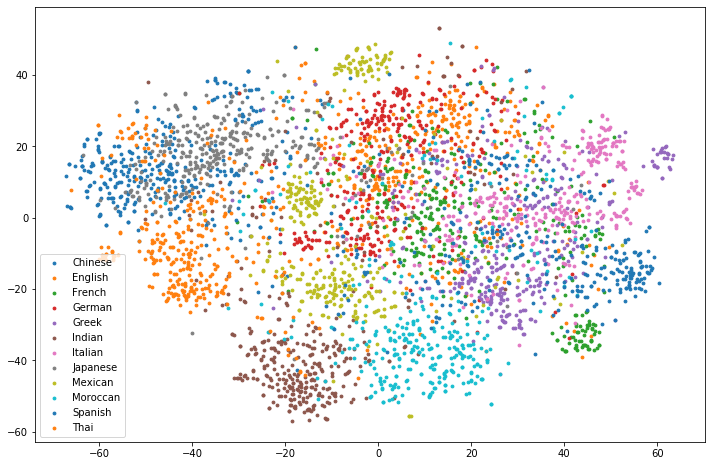

In [47]:
plt.figure(figsize=(12,8))
plt.tight_layout()
col_name=['Chinese','English','French','German','Greek','Indian','Italian','Japanese','Mexican','Moroccan','Spanish','Thai']
for i in range(12):
    start=cuisines[cuisines['cuisine']==i].index[0]
    stop=cuisines[cuisines['cuisine']==i].index[-1]

    plt.scatter(X_tsne[start:stop+1,0],X_tsne[start:stop+1,1],s=8,label=col_name[i])
# plt.scatter(X_tsne[:,0],X_tsne[:,1],label=cuisines['cuisine'])
plt.legend()

plt.savefig("tsnevisual.pdf",bbox_inches='tight',pad_inches=0.0)

In [82]:
cuisines

,Unnamed: 0,allspice,almond,anchovy,anise,apple,arborio rice,artichoke,asparagus,assorted vegetables,...,white fish,white onion,wine,wine vinegar,worcestershire sauce,yeast,yogurt,zest,zucchini,cuisine
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4142,4231,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4143,4232,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4144,4233,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
4145,4234,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11


In [91]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca=pca.fit_transform(cuisines.iloc[:,1:-1])
X_pca.shape

(4147, 2)

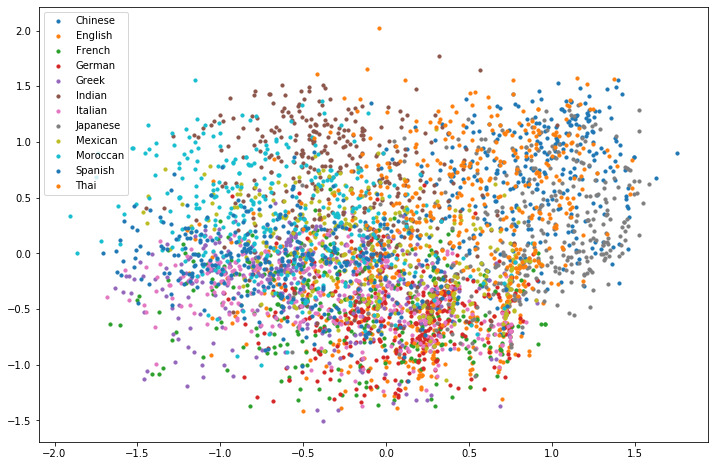

In [92]:
plt.figure(figsize=(12,8))
plt.tight_layout()
col_name=['Chinese','English','French','German','Greek','Indian','Italian','Japanese','Mexican','Moroccan','Spanish','Thai']
for i in range(12):
    start=cuisines[cuisines['cuisine']==i].index[0]
    stop=cuisines[cuisines['cuisine']==i].index[-1]

    plt.scatter(X_pca[start:stop+1,0],X_pca[start:stop+1,1],s=10,label=col_name[i])
# plt.scatter(X_tsne[:,0],X_tsne[:,1],label=cuisines['cuisine'])
plt.legend()

plt.savefig("pcavisual.pdf",bbox_inches='tight',pad_inches=0.0)